<a href="https://colab.research.google.com/github/dishapalan02/AI-Enabled-IT-Service-Ticketing-tool/blob/Develop_Disha/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI Enabled IT Ticketing Service Tool 

# 1. PROBLEM STATEMENT 

In any of the IT industry, incident management plays an important role in delivering quality and timely support to its customers across the globe.

The incidents are generally created by various stakeholders like end users, vendors, IT users, etc. They might not have right information as to which team the ticket should go to. Hence, to imporve and retain customer satisfaction, it is very important that the ticket is assigned to the right group of people for faster and approproiate resolution. In Many Organizations this is still a manual process. There re few problems with the manual process:
1. Manual assignment of incidents is time consuming
2. It requires human efforts
3. There may bemistakes due to human errors and resource consumption is carried out ineffectively because ofthe misaddressing
4. Manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service

L1 / L2 needs to spend time to review Standard Operating Procedures (SOPs) before assigning to Functional teams (Minimum 25–30% of incidents needs to be reviewed for SOPs before ticket assignment).  

15 mins are being spent for SOP review for each incident. Minimum of 1 FTE effort needed only for incident assignment to L3 teams.  

During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple instances of incidents getting assigned to wrong functional groups.  

Around 25% of Incidents are wrongly assigned to functional teams. Additional effort needed for Functional teams to re-assign to right functional groups 

During this process, some of the incidents are in queue and not addressed timely resulting in poor customer service and loss of business.




# 2. OBJECTIVE

We are building an AI solution which will enable organizations to classify incidents to the right functional group by implementing the best suited machine learning model and leading to customer satisfaction. 

Guided by AI, organizations can reduce the resolution time and focus on more productive tasks. This will overcome and save time with below losses:

1. Time latency sue to review of SOPs before assigning to right functional group 
2. Incorrect assignments to functional groups
3. #ToDo ( Include figures for losses and revenue ) --> to be checked by Gloria 

# 3. SOLUTION

ToDo ( Add the different approches taken )

## 3.1 EDA

## 3.1.1 Install the required libraries

In [1]:
pip install sweetviz

     |████████████████████████████████| 15.1MB 205kB/s 
     |████████████████████████████████| 81kB 10.0MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [2]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 256kB 8.3MB/s 
     |████████████████████████████████| 3.1MB 17.0MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 1.1MB 37.9MB/s 
     |████████████████████████████████| 296kB 19.5MB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107437 sha256=68b9bf373799c6686155d010366e24599f1c929b2e5af6ba57003f4bfd5b49e0
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27099 sha256=3a7bdab0a6703ede6b41577086954f35635d73a44e7a4daf62f51af1407a660e
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built phik htmlmin
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
  Found existing installation: pandas-profiling 1.4.1
    Uninstalling pa

### 3.1.2 Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from pandas_profiling import ProfileReport
from wordcloud import WordCloud, STOPWORDS 

%matplotlib inline


## 3.1.2 Import the dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Fetch the data from input data stored in Goolge drive
incidents_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/input_data.xlsx')

In [6]:
# Check the first 5 rows of data
incidents_data.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


## 3.1.3 Visualizing and analysing the data 

3.1.3.1 Report visualization using SweetViz

                                             |          | [  0%]   00:00 -> (? left)

Report Incidents_sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



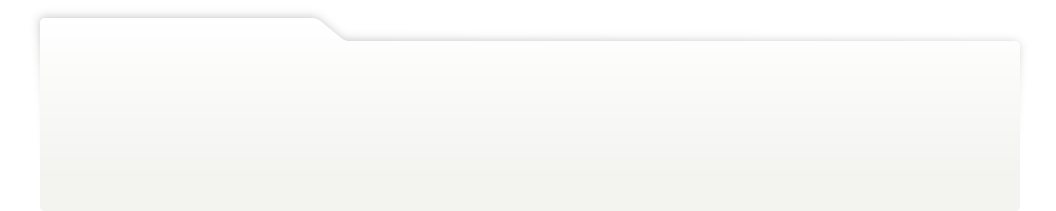
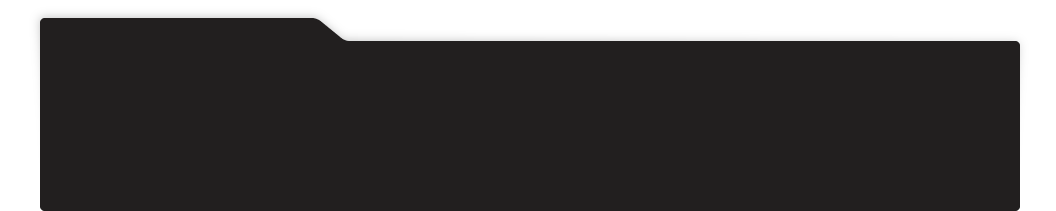
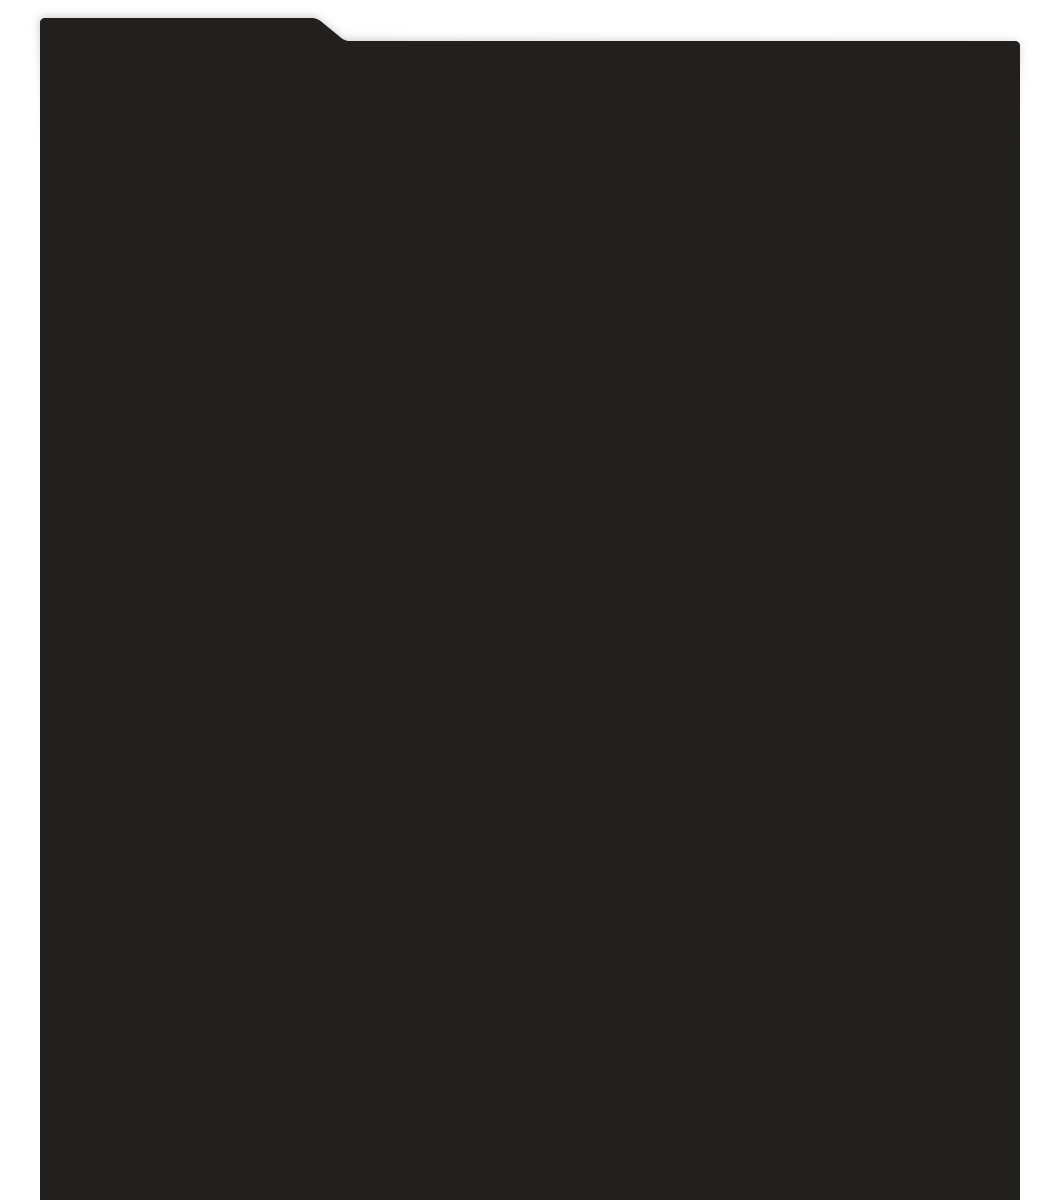
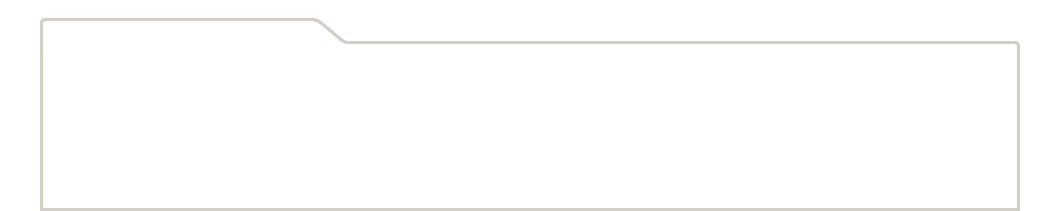
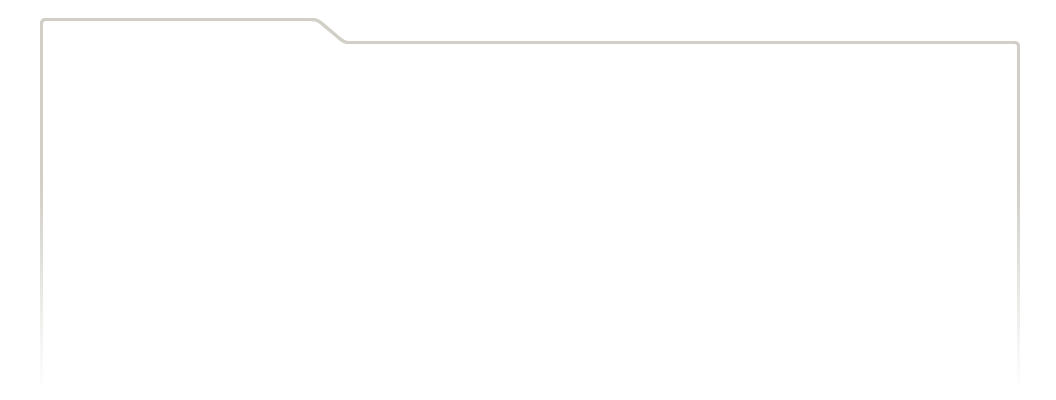
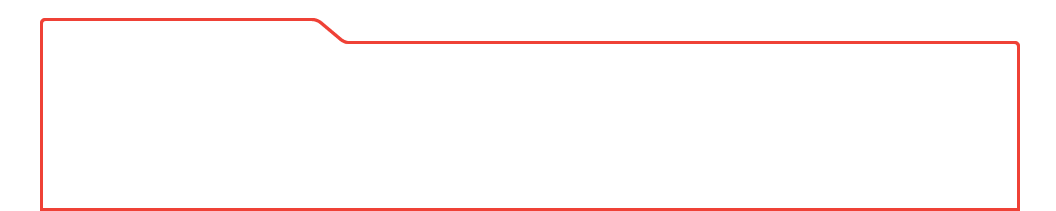
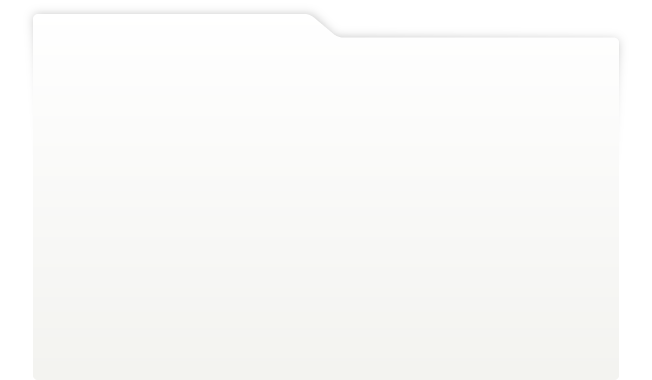
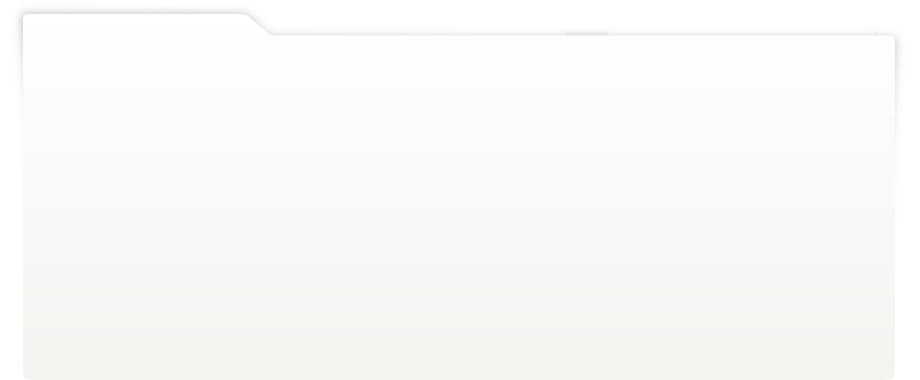
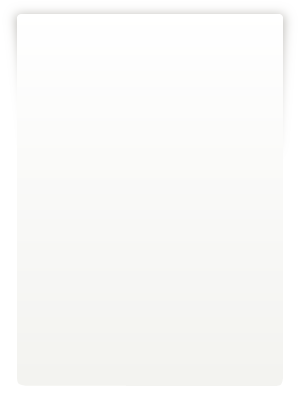
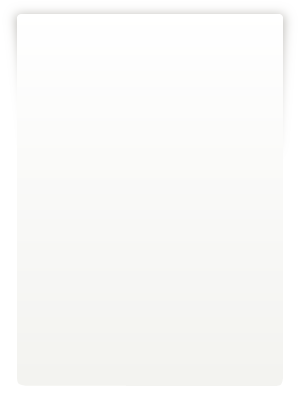
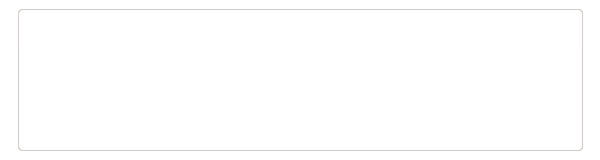
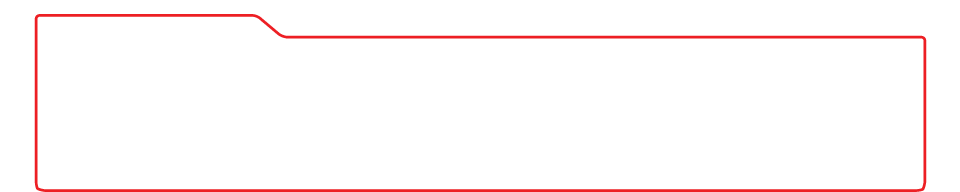
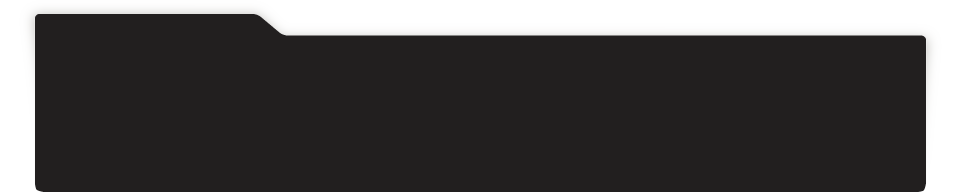
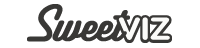
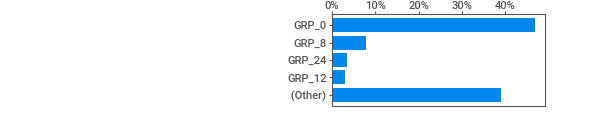
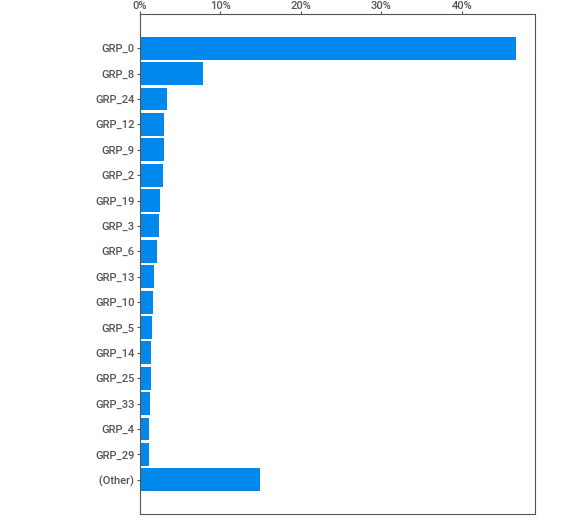
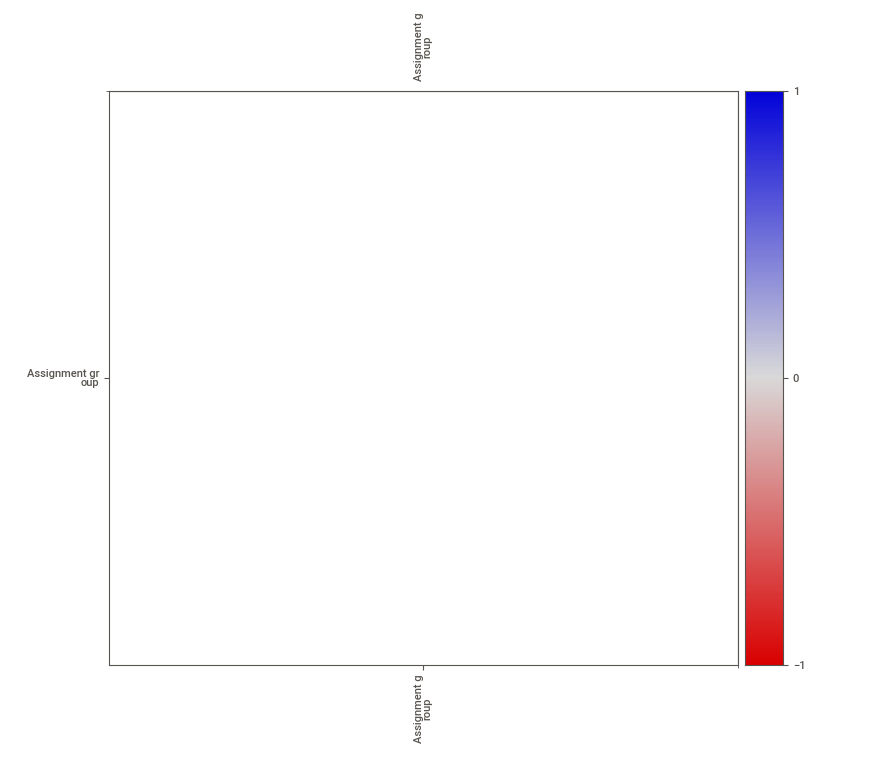
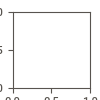

In [7]:
incidents_report = sv.analyze(incidents_data)
#display the report
incidents_report.show_html('Incidents_sweetviz_report.html')
incidents_report.show_notebook()

3.1.3.2 Report visualization using Pandas Profiling

In [8]:
incident_report = ProfileReport(incidents_data, html={'style': {'full_width' : True}})
incident_report.to_file(output_file='Incidents_pandas_profiling_report.html')
incident_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

3.1.3.3 Observations from SweetViz and Pada Profiling reports above

From Above two reports we have below onservations: 
1. Shape of the data - { Rows : 8500, Columns : 4 }
2. Total features - 3
    
    2.1. Short Description - Text

    2.2. Description - Text

    2.3. Caller - Text
3. Target Column - 1
  
    3.1 Assignment Group - Categorical
4. There are 84 duplicate records in total. We see further below about specific columns and strtegy to handle duplicates.
5. We shall also check if we need to create new features as I think all the columns are important. May be we can also find some hidden patterns as below: 
          A. Common Issues -> user can be trained if possible 
          B. Common Caller -> May be user needs training or help with hardware or software
          C. #ToDo To find if issue is controllable or not --> Check if possible .
          D. To find if customer is happy with service or needs further imporvement and assistance

Now let's look at individual feature: 
1. **Short description** 
  
   A. Total values - 8492 ( > 99% )
   
   B. Missing values - 8 ( < 1% )

   C. Distinct values - 7481 (88%)

   D. Mostly occuring value - password reset ( 0.4% )
   
   E. We can also see the number of times each value is being repeated

   F. Max length of statement - 159

   G. It contains:
    
        Characters -> Lowercase Letter, Punctuation, 
        Uppercase Letter, Decimal Number, 
        Math Symbol, Math_Symbol, 
        Modifier Symbol, Other_Number, 
        Other_Symbol, Currency_Symbol

        Scripts -> Common(ASCII) and Latin

  H. With this we can say that we will also have to translate based on the scripts as part of data pre processing
2. **Description** 
  
   A. Total values - 8499 ( > 99% )
   
   B. Missing values - 1 ( < 1% )

   C. Distinct values - 7817 ( 92% )

   D. Mostly occuring value - it shows "the" ( 0.7% ) but we shall check this after removal of stop words. But we consider the next which is windows password reset ( 0.3% )

   E. We can also see the number of times each value is being repeated

   F. Max length of statement - 13001

   G. It contains:
    
        Characters -> Lowercase Letter, Punctuation, 
        Uppercase Letter, Decimal Number, 
        Math Symbol, Math_Symbol, 
        Modifier Symbol, Other_Number, 
        Other_Symbol, Currency_Symbol

        Scripts -> Common(ASCII) and Latin

  H. With this we can say that we will also have to translate based on the scripts as part of data pre processing 
3. **Caller** 
  
   A. Total values - 8500 ( 100% )
   
   B. Missing values - no missing value
 
   C. Distinct values - 2950 ( 35% )

   D. Mostly occuring value - bpctwhsn kzqsbmtp (10%)

   E. We can also see the number of times each value is being repeated

   F. Max length of statement - 30

   G. It contains:
    
        Characters -> Lowercase Letter, Space_Separator, 
        Uppercase Letter, Connector_Punctuation

        Scripts -> Common(ASCII) and Latin

  H. With this we can say that we will also have to work on the stopwords removal and also translating based on the scripts
4. **Assignment Group** 
  
   A. Total values - 8500 ( 100% )
   
   B. Missing values - no missing value 

   C. Distinct values - 74 ( < 1% )

   D. Mostly occuring value - GRP_0 (47% ~ nearly half of the data --> Hence very high biased data, so strategy to be employed to reduce the bias here)

   E. We can also see the number of times each value is being repeated

   G. This indicates we can merge few assignment groups with smaller percentage to reduce overall number of categories. 


3.1.3.4 Other Observations

1. There are duplicates which needs to be tackled
2. There are mojibake texts in the description and short description which needs to be processed 
3. There are texts belonging to different languages which needs translations
4. There are email ids, blank spaces, dates, numbers which needs to be processed
5. There are missing values to be treated


### 3.1.3 Further Data Analysis

In [9]:
# Print the counts for unique values of short description
incidents_data['Short description'].value_counts()

password reset                                                                                                          38
windows password reset                                                                                                  29
account locked in ad                                                                                                    24
windows account locked                                                                                                  23
erp SID_34 account unlock                                                                                               19
                                                                                                                        ..
ticket update inplant_862994                                                                                             1
the HostName_80 network connection lost at 9:05 am in apac time ,  the connection lost has been going on 10 minutes      1
india company: t

In [10]:
def show_word_cloud(column):
    
    comment_words = ' '

    # iterate through the csv file 
    for val in column: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    min_font_size = 10).generate(comment_words) 
    
    return wordcloud

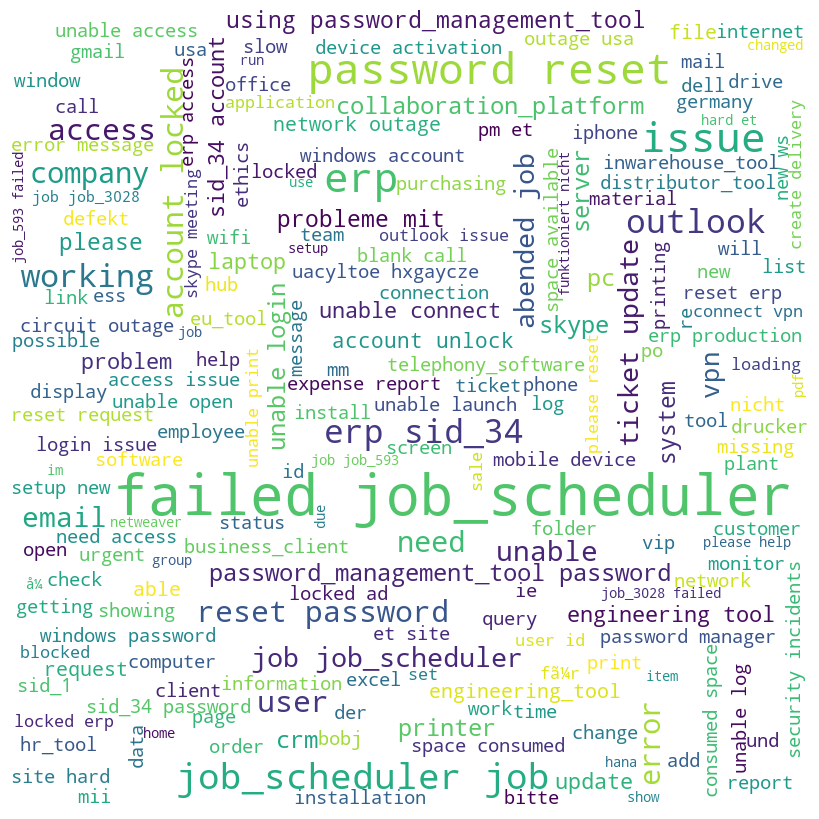

In [11]:
#Word cloud for short description

wordcloud_short_desc = show_word_cloud(incidents_data['Short description'])
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_short_desc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

#ToDo Observation from word cloud

In [12]:
# Print the counts for unique values of Description
incidents_data["Description"].value_counts()

the                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       56
windows password reset                                                                                                                                                                                                                                                     

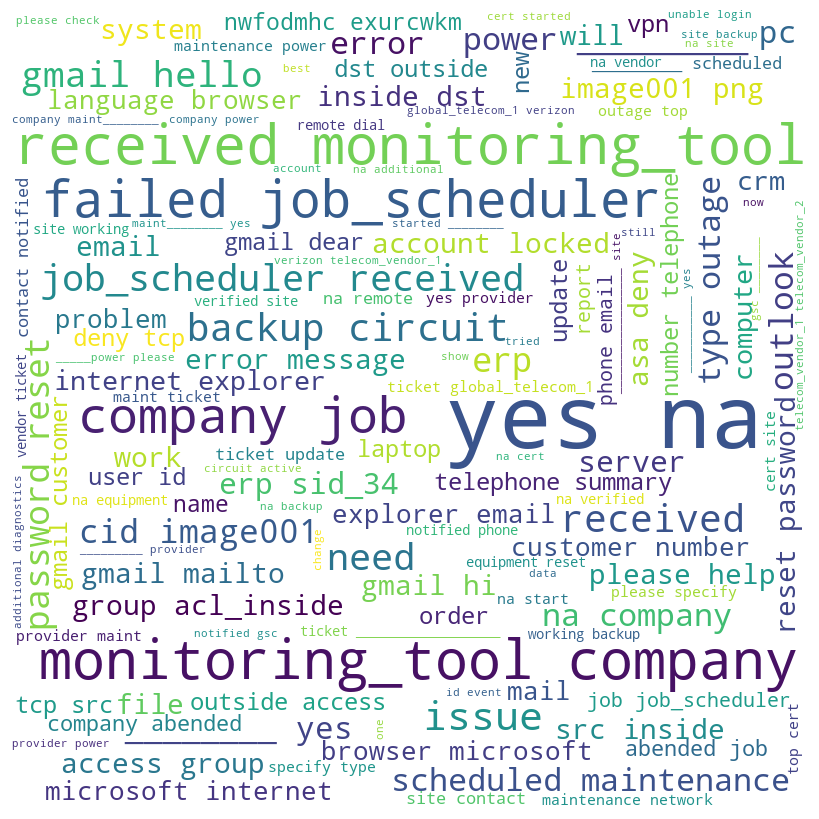

In [13]:
#Word cloud for description

wordcloud_desc = show_word_cloud(incidents_data['Description'])
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_desc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [ ]:
# Print the counts for unique values of Caller
caller_counts = incidents_data["Caller"].value_counts().reset_index()
top_ten_callers = caller_counts[:10].copy()

In [167]:
#Caller Counts
print ( "All Caller Counts")
caller_counts


All Caller Counts


,index,Caller
0,bpctwhsn kzqsbmtp,810
1,ZkBogxib QsEJzdZO,151
2,fumkcsji sarmtlhy,134
3,rbozivdq gmlhrtvp,87
4,rkupnshb gsmzfojw,71
...,...,...
2945,hbvwqine eakqyovu,1
2946,jkmeusfq vjpckzsa,1
2947,pstlrmvf jokbeqnp,1
2948,hctduems znalhivf,1


In [168]:
#Caller Counts
print ( "Top Ten Callers")
top_ten_callers

Top Ten Callers


,index,Caller
0,bpctwhsn kzqsbmtp,810
1,ZkBogxib QsEJzdZO,151
2,fumkcsji sarmtlhy,134
3,rbozivdq gmlhrtvp,87
4,rkupnshb gsmzfojw,71
5,jloygrwh acvztedi,64
6,spxqmiry zpwgoqju,63
7,oldrctiu bxurpsyi,57
8,olckhmvx pcqobjnd,54
9,dkmcfreg anwmfvlg,51


In [169]:
len(top_ten_callers)

10

In [170]:
if len(caller_counts) > 10:
  remaining_caller_df = pd.DataFrame({"index":['Combined values'],
                                      "Caller":sum(caller_counts.Caller[10:]) })

In [172]:
top_ten_callers_for_chart = top_ten_callers.append(remaining_caller_df, ignore_index = True)
top_ten_callers_for_chart

,index,Caller
0,bpctwhsn kzqsbmtp,810
1,ZkBogxib QsEJzdZO,151
2,fumkcsji sarmtlhy,134
3,rbozivdq gmlhrtvp,87
4,rkupnshb gsmzfojw,71
5,jloygrwh acvztedi,64
6,spxqmiry zpwgoqju,63
7,oldrctiu bxurpsyi,57
8,olckhmvx pcqobjnd,54
9,dkmcfreg anwmfvlg,51


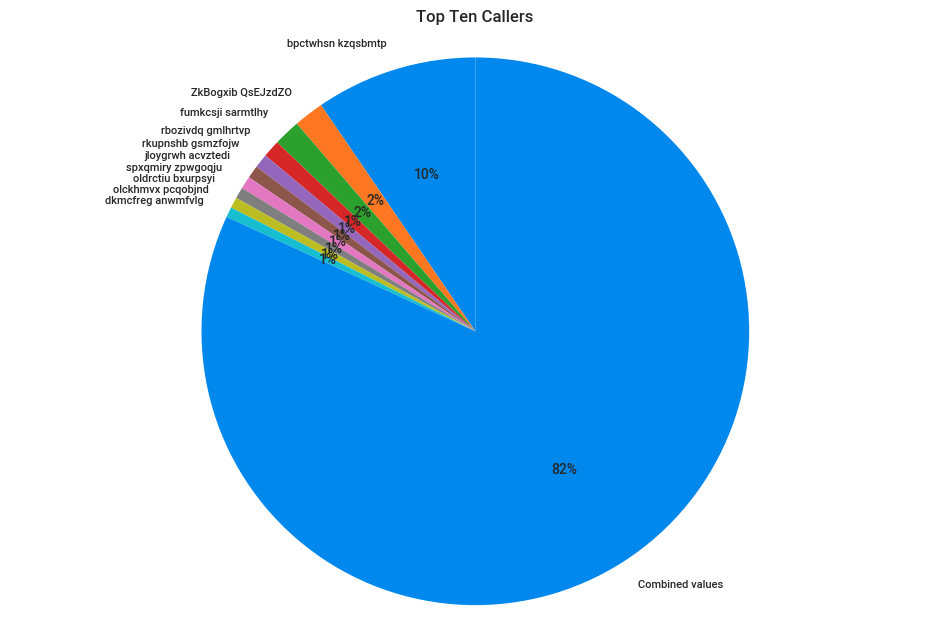

In [173]:
# Pie chart for top 10 callers
plt.figure(figsize=(12,8))
plt.pie(top_ten_callers_for_chart['Caller'], labels=top_ten_callers_for_chart['index'],autopct='%1.0f%%',startangle=90)
plt.title("Top Ten Callers")
plt.axis('equal')
plt.show()


From Above we see that 10% of requests are from Caller "bpctwhsn kzqsbmtp". May be this user needs some training or lets see if there is some other issue.

In [18]:
# Print the counts for unique values of Assignment Group
incidents_data['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_35       1
GRP_64       1
GRP_61       1
GRP_67       1
GRP_73       1
Name: Assignment group, Length: 74, dtype: int64

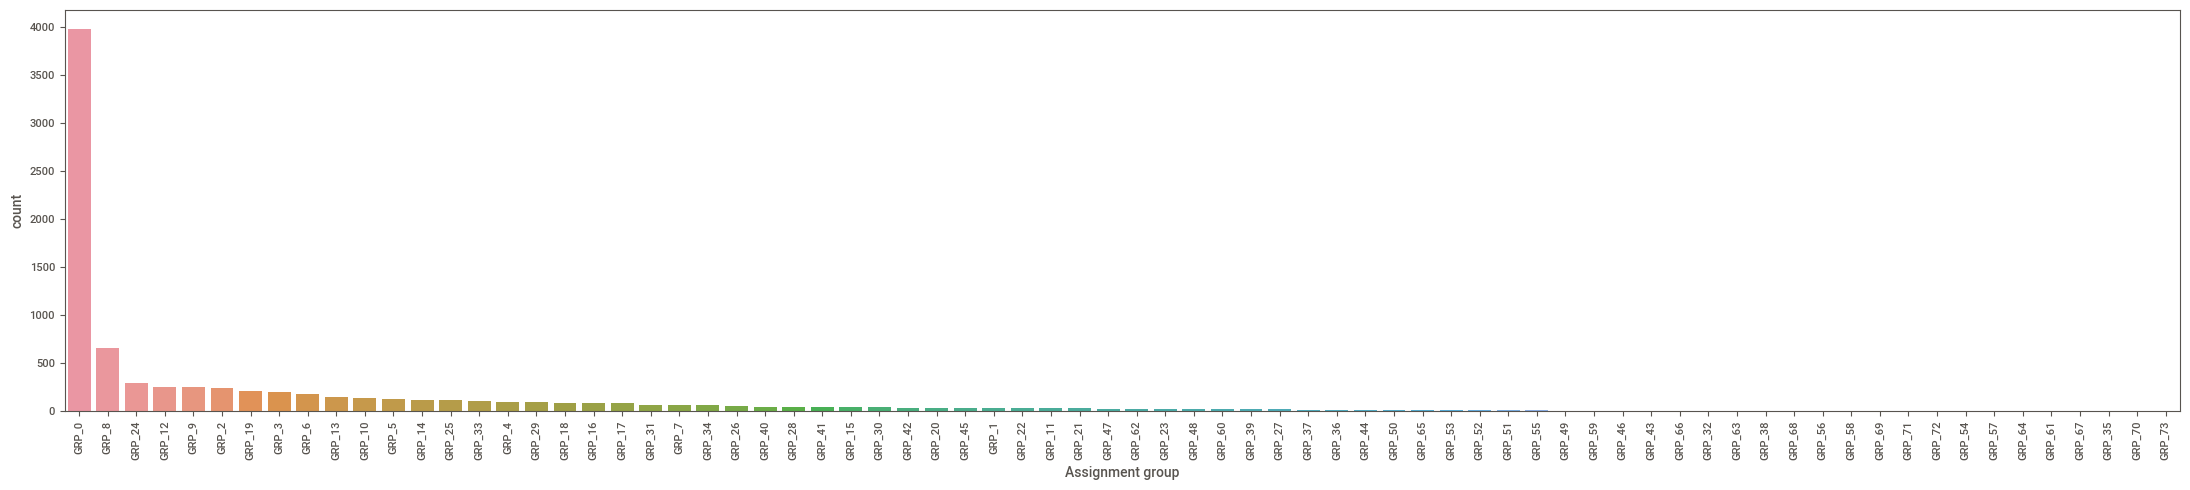

In [19]:
#Visualizing imbalance in the target class to find what all are smallest groups that can be merged to reduce total number of classification classes.
plt.figure(figsize=(22,5))
sortOrder = incidents_data['Assignment group'].value_counts().sort_values(ascending=False).index
ax = sns.countplot(x='Assignment group', data=incidents_data,order=sortOrder)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()


In [20]:
ticket_selected_grp = incidents_data.groupby(['Assignment group']).filter(lambda x: len(x) <=30)
print("No of Assignment groups with less than or equal to 30 tickets", ticket_selected_grp['Assignment group'].nunique())


No of Assignment groups with less than or equal to 30 tickets 40


We shall see the assignment group distribution 

In [21]:
ticket_excluded_grp = ['GRP_0','GRP_8']
ticket_excluded_grp.extend(ticket_selected_grp['Assignment group'].unique())

ticket_excluded_grps = incidents_data[~incidents_data['Assignment group'].isin(ticket_excluded_grp)]

ticket_assigned_grp = pd.DataFrame(ticket_excluded_grps.groupby('Assignment group').size(),columns=['Count']).reset_index()


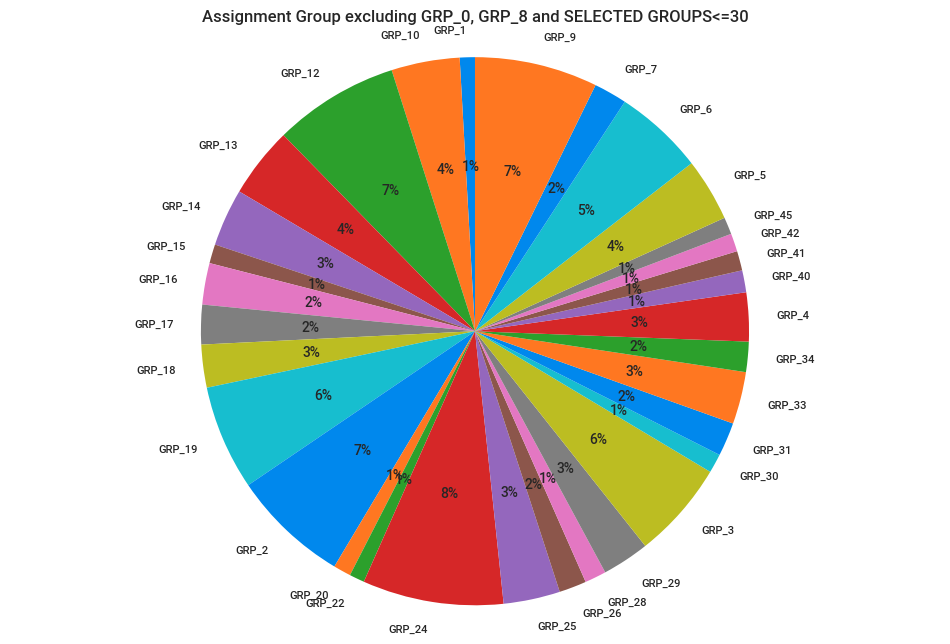

In [22]:
plt.figure(figsize=(12,8))
plt.pie(ticket_assigned_grp.Count,labels=ticket_assigned_grp['Assignment group'],autopct='%1.0f%%',startangle=90)
plt.title("Assignment Group excluding GRP_0, GRP_8 and SELECTED GROUPS<=30")
plt.axis('equal')
plt.show()


In [23]:
incidents_data_counts = incidents_data['Assignment group'].value_counts().reset_index()

In [24]:
incidents_data_counts.head()

,index,Assignment group
0,GRP_0,3976
1,GRP_8,661
2,GRP_24,289
3,GRP_12,257
4,GRP_9,252


We can use above figure to define the ranges to see which groups have tickets in below range. This will help us understand the most important groups to focus on. The ranges can be as below: 
1. 1 ticket
2. 2 tickets
3. 3-8 tickets
4. 9-14 tickets
5. 15-30 tickets
6. 31-50 tickets
7. 51-100 tickets
8. 101-200 tickets
9. 201-300 tickets
10. more than 300 tickets

In [25]:
ticket_bins = pd.DataFrame(columns=['No. of tickets','No. of Assignment groups'])
_1_ticket = {'No. of tickets':'1 ticket','No. of Assignment groups':len(incidents_data_counts[incidents_data_counts['Assignment group'] == 1])}
_2_tickets = {'No. of tickets':'2 tickets',
              'No. of Assignment groups':len(incidents_data_counts[incidents_data_counts['Assignment group'] == 2 ])}
_3_8_tickets = {'No. of tickets':' 3-8 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 2 )& (incidents_data_counts['Assignment group'] < 9 )])}
_9_14_tickets = {'No. of tickets':' 9-14 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 8)& (incidents_data_counts['Assignment group'] < 15 )])}
_15_30_tickets = {'No. of tickets':' 15-30 ticket',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 14)& (incidents_data_counts['Assignment group'] < 31 )])}      
_31_50_tickets = {'No. of tickets':' 31-50 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 30)& (incidents_data_counts['Assignment group'] < 51)])}      
_51_100_tickets = {'No. of tickets':' 51-100 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 50)& (incidents_data_counts['Assignment group'] < 101)])}   
_101_200_tickets = {'No. of tickets':' 101-200 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 100)& (incidents_data_counts['Assignment group'] < 201)])}
_201_300_tickets = {'No. of tickets':' 201-300 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 200)& (incidents_data_counts['Assignment group'] < 301)])}                                                       
_301_tickets = {'No. of tickets':' > 301 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 300)])}
# Append row to the bins
ticket_bins = ticket_bins.append([_1_ticket,_2_tickets,_3_8_tickets,
                          _9_14_tickets,_15_30_tickets,_31_50_tickets,_51_100_tickets,_101_200_tickets,_201_300_tickets,_301_tickets], ignore_index=True)

print(ticket_bins)

     No. of tickets No. of Assignment groups
0          1 ticket                        6
1         2 tickets                        5
2       3-8 tickets                       13
3      9-14 tickets                        4
4      15-30 ticket                       12
5     31-50 tickets                       10
6    51-100 tickets                        9
7   101-200 tickets                        8
8   201-300 tickets                        5
9     > 301 tickets                        2


There are total of 40 Assignment groups which have tickets less than  or equal to 30. Lets see the if we can combine the assignment groups having few tickets and reduce the number of classes for classification. 

For this we shall also check if the same kind of issues are handled by other assignment groups in further analysis with which will be a deciding factor to merge the classes.

Let's see the assignment group distribution for the range of ticksts we see above in the form of pie chart

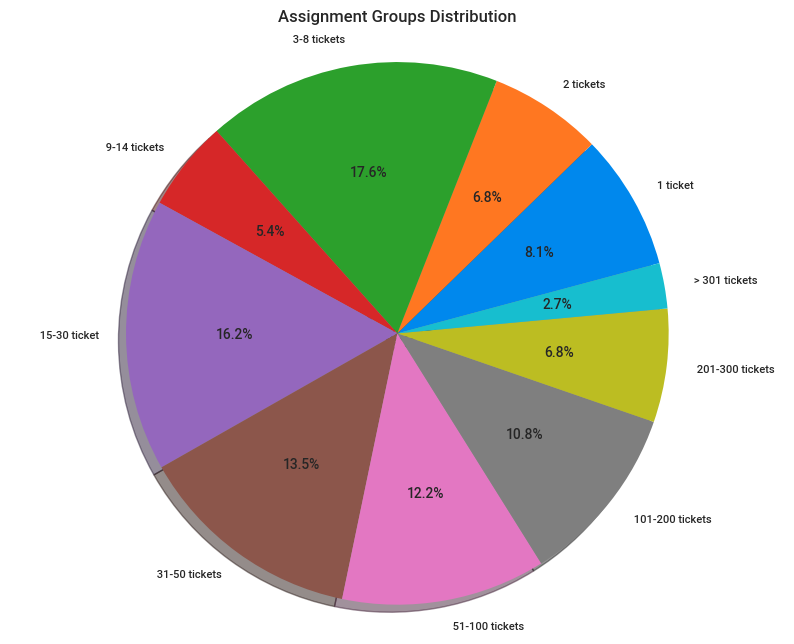

In [26]:
plt.figure(figsize=(10, 8))
plt.pie(ticket_bins['No. of Assignment groups'],labels=ticket_bins['No. of tickets'],autopct='%1.1f%%', startangle=15, shadow = True);
plt.title('Assignment Groups Distribution')
plt.axis('equal');

In [27]:
ticket_selected_grp = incidents_data.groupby(['Assignment group']).filter(lambda x: len(x) <=2)
print("No of Assignment groups with less than or equal to 2 tickets", ticket_selected_grp['Assignment group'].nunique())


No of Assignment groups with less than or equal to 2 tickets 11


In [28]:
assignment_group_ticket_counts = incidents_data_counts[incidents_data_counts['index'].isin(ticket_selected_grp['Assignment group'])]

In [29]:
assignment_group_ticket_counts

,index,Assignment group
63,GRP_69,2
64,GRP_71,2
65,GRP_72,2
66,GRP_54,2
67,GRP_57,2
68,GRP_70,1
69,GRP_35,1
70,GRP_64,1
71,GRP_61,1
72,GRP_67,1


The groups which gets either 1 or 2 tickets are as we see above:
1. GRP_57
2. GRP_71
3. GRP_72
4. GRP_54
5. GRP_69
6. GRP_64
7. GRP_73
8. GRP_61
9. GRP_70
10. GRP_67
11. GRP_35

Let's see if the tickets to these groups can also be handled by some other assignment groups. May be then we can ignore those groups and reduce the classes.

In [30]:
incidents_data[incidents_data['Assignment group']=='GRP_57']['Short description']

1886    i cannot access the dob report.  i was able to...
6839    job Job_1148 failed in job_scheduler at: 08/22...
Name: Short description, dtype: object

In [31]:
groups = incidents_data["Short description"].str.contains("job_scheduler").reset_index()

In [32]:
group_desc = groups[groups['Short description'] == True]

group_desc

,index,Short description
47,47,True
50,50,True
59,59,True
60,60,True
67,67,True
...,...,...
8442,8442,True
8448,8448,True
8460,8460,True
8462,8462,True


In [33]:
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

GRP_8     418
GRP_9     184
GRP_6     117
GRP_5     114
GRP_10     63
GRP_60     13
GRP_47     12
GRP_12      8
GRP_45      8
GRP_1       7
GRP_13      4
GRP_14      3
GRP_18      3
GRP_29      3
GRP_57      1
GRP_44      1
Name: Assignment group, dtype: int64

We see from above that **GRP_57 can be ignored** as there are other groups which have the capabiltiy to handle issues which GRP_57 are assigned to

In [34]:
print(incidents_data[incidents_data['Assignment group']=='GRP_71']['Short description'])


7597                     na production files not received
8099    emea files not processed as per schedule - che...
Name: Short description, dtype: object


In [35]:
groups = incidents_data["Short description"].str.contains("files not").reset_index()
group_desc = groups[groups['Short description'] == True]
print(group_desc)
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

      index Short description
7597   7597              True
8099   8099              True


GRP_71    2
Name: Assignment group, dtype: int64

We see from above that **GRP_71 cannot be ignored** as there are no other groups which have the capabiltiy to handle issues which GRP_71 are assigned to

In [36]:
print(incidents_data[incidents_data['Assignment group']=='GRP_72']['Short description'])


7828                                      account locked.
8387    ticket (ticket_no1538972) update to anftgup nf...
Name: Short description, dtype: object


In [37]:
groups = incidents_data["Short description"].str.contains("account locked").reset_index()
group_desc = groups[groups['Short description'] == True]
print(group_desc)
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

      index Short description
18       18              True
27       27              True
54       54              True
81       81              True
165     165              True
...     ...               ...
8267   8267              True
8268   8268              True
8367   8367              True
8458   8458              True
8489   8489              True

[184 rows x 2 columns]


GRP_0     181
GRP_72      1
GRP_34      1
GRP_2       1
Name: Assignment group, dtype: int64

We see from above that **GRP_72 can be ignored** as there are other groups which have the capabiltiy to handle issues which GRP_72 are assigned to

In [38]:
print(incidents_data[incidents_data['Assignment group']=='GRP_54']['Short description'])

1637    receiving product in logical warehouse (plant_...
2983    question  -  who is taking care on report zzsd...
Name: Short description, dtype: object


In [39]:
groups = incidents_data["Short description"].str.contains("warehouse").reset_index()
group_desc = groups[groups['Short description'] == True]
print(group_desc)
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

      index Short description
215     215              True
329     329              True
504     504              True
685     685              True
935     935              True
...     ...               ...
8030   8030              True
8035   8035              True
8038   8038              True
8044   8044              True
8192   8192              True

[81 rows x 2 columns]


GRP_13    30
GRP_8     14
GRP_0      9
GRP_10     8
GRP_18     5
GRP_20     3
GRP_4      2
GRP_7      2
GRP_29     2
GRP_54     1
GRP_25     1
GRP_3      1
GRP_19     1
GRP_32     1
GRP_2      1
Name: Assignment group, dtype: int64

We see from above that **GRP_54 can be ignored** as there are other groups which have the capabiltiy to handle issues which GRP_54 are assigned to

In [40]:
print(incidents_data[incidents_data['Assignment group']=='GRP_69']['Short description'])

5843              'repeat outbound connection for 135/tcp
7154    security incidents - ( #in33417637 ) : repeat ...
Name: Short description, dtype: object


In [41]:
groups = incidents_data["Short description"].str.contains("connection").reset_index()
group_desc = groups[groups['Short description'] == True]
print(group_desc)
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

      index Short description
73       73              True
323     323              True
522     522              True
575     575              True
763     763              True
...     ...               ...
7589   7589              True
7632   7632              True
7835   7835              True
7870   7870              True
8247   8247              True

[66 rows x 2 columns]


GRP_0     29
GRP_4      6
GRP_2      6
GRP_19     5
GRP_31     5
GRP_3      4
GRP_69     2
GRP_8      2
GRP_1      1
GRP_28     1
GRP_55     1
GRP_50     1
GRP_30     1
GRP_53     1
GRP_45     1
Name: Assignment group, dtype: int64

We see from above that **GRP_69 can be ignored** as there are other groups which have the capabiltiy to handle issues which GRP_69 are assigned to

In [42]:
print(incidents_data[incidents_data['Assignment group']=='GRP_64']['Short description'])

3628    r: ticket_no1402627 change in report zsdslsum ...
Name: Short description, dtype: object


In [43]:
groups = incidents_data["Short description"].str.contains("change in report").reset_index()
group_desc = groups[groups['Short description'] == True]
print(group_desc)
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

      index Short description
3628   3628              True


GRP_64    1
Name: Assignment group, dtype: int64

We see from above that **GRP_71 cannot be ignored** as there are no other groups which have the capabiltiy to handle issues which GRP_71 are assigned to

In [44]:
print(incidents_data[incidents_data['Assignment group']=='GRP_73']['Short description'])

8197    oneteam sso not working
Name: Short description, dtype: object


In [45]:
groups = incidents_data["Short description"].str.contains("oneteam").reset_index()
group_desc = groups[groups['Short description'] == True]
print(group_desc)
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

      index Short description
7967   7967              True
8197   8197              True
8211   8211              True
8478   8478              True


GRP_0     3
GRP_73    1
Name: Assignment group, dtype: int64

We see from above that **GRP_73 can be ignored** as there are other groups which have the capabiltiy to handle issues which GRP_73 are assigned to

In [46]:
print(incidents_data[incidents_data['Assignment group']=='GRP_61']['Short description'])

3036    (srvlavpwdrprd01.company.company.com) is not r...
Name: Short description, dtype: object


In [47]:
groups = incidents_data["Short description"].str.contains("srvlavpwdrprd01").reset_index()
group_desc = groups[groups['Short description'] == True]
print(group_desc)
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

      index Short description
3036   3036              True


GRP_61    1
Name: Assignment group, dtype: int64

We see from above that **GRP_61 cannot be ignored** as there are no other groups which have the capabiltiy to handle issues which GRP_61 are assigned to

In [48]:
print(incidents_data[incidents_data['Assignment group']=='GRP_70']['Short description'])

6401    a link on an e-mail says i am "forbidden"
Name: Short description, dtype: object


In [49]:
groups = incidents_data["Short description"].str.contains("forbidden").reset_index()
group_desc = groups[groups['Short description'] == True]
print(group_desc)
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

      index Short description
6401   6401              True


GRP_70    1
Name: Assignment group, dtype: int64

We see from above that **GRP_70 cannot be ignored** as there are no other groups which have the capabiltiy to handle issues which GRP_70 are assigned to

In [50]:
print(incidents_data[incidents_data['Assignment group']=='GRP_67']['Short description'])

5154    unable to complete forecast
Name: Short description, dtype: object


In [51]:
groups = incidents_data["Short description"].str.contains("forecast").reset_index()
group_desc = groups[groups['Short description'] == True]
print(group_desc)
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

      index Short description
2419   2419              True
2425   2425              True
5154   5154              True
7328   7328              True
7403   7403              True


GRP_22    3
GRP_67    1
GRP_40    1
Name: Assignment group, dtype: int64

We see from above that **GRP_67 can be ignored** as there are other groups which have the capabiltiy to handle issues which GRP_67 are assigned to

In [52]:
print(incidents_data[incidents_data['Assignment group']=='GRP_35']['Short description'])

401    need access to erp kp06789
Name: Short description, dtype: object


In [53]:
groups = incidents_data["Short description"].str.contains("erp").reset_index()
group_desc = groups[groups['Short description'] == True]
print(group_desc)
incidents_data_grp = incidents_data.loc[group_desc.index]
incidents_data_grp['Assignment group'].value_counts()

      index Short description
6         6              True
18       18              True
25       25              True
29       29              True
36       36              True
...     ...               ...
8453   8453              True
8454   8454              True
8459   8459              True
8488   8488              True
8493   8493              True

[879 rows x 2 columns]


GRP_0     591
GRP_2      55
GRP_14     34
GRP_13     20
GRP_10     15
GRP_15     11
GRP_18     10
GRP_24     10
GRP_8       9
GRP_9       9
GRP_11      8
GRP_25      8
GRP_5       7
GRP_45      7
GRP_29      7
GRP_40      6
GRP_3       6
GRP_19      6
GRP_4       5
GRP_41      5
GRP_6       5
GRP_42      4
GRP_20      4
GRP_31      4
GRP_28      3
GRP_1       3
GRP_47      3
GRP_53      3
GRP_30      3
GRP_59      2
GRP_49      2
GRP_52      2
GRP_21      2
GRP_33      2
GRP_44      2
GRP_46      1
GRP_26      1
GRP_35      1
GRP_61      1
GRP_16      1
GRP_12      1
Name: Assignment group, dtype: int64

We see from above that **GRP_35 can be ignored** as there are other groups which have the capabiltiy to handle issues which GRP_35 are assigned to

So finally, we see that below groups can be ignored based on above analysis. We will decide this later after feature engineering
1. GRP_72
2. GRP_54
3. GRP_57
4. GRP_69
5. GRP_67
6. GRP_35
7. GRP_73

But, we shall not ignore below assignment groups:
1. GRP_71
2. GRP_70
3. GRP_61
4. GRP_64

## 3.3 FEATURE ENGINEERING

### 3.3.1 CHECKING NULL VALUES

In [54]:
# Print the null values from data
incidents_data[incidents_data.isnull().any(axis=1)]

,Short description,Description,Caller,Assignment group
2604,NaN,\n\nreceived from: ohdrnswl.rezuibdt@gmail.com...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\n-connected to the user system using teamview...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\n-connected to t...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\n-connected to t...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\n-connected to t...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\n-connected to t...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\n\nreceived from: eqmuniov.ehxkcbgj@gmail.com...,eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


### 3.3.2 NULL VALUE TREATEMENT STRATEGIES

We see there are arond 9 records with null values. Hence we can use below strategies to replace null values:
1. Drop the records with null values
2. Replace null value (NaN) with empty string
3. Look for same description in any other record and then replace the corresponding shor description or in case of description has null value then search for same short description and replace description with corresponding description

We will go with approach 2 here that we will replace the null values with empty string. This is because we do not want to loose descriptions with dropping and with approach 3 we might end up creating further duplicates inside.

So let's replce NaN with empty strings

### 3.3.3 REPLACING NULL VALUES WITH BLANK

In [55]:
# Replace null(NaN) values from short description and descriptions
incidents_data['Short description'] = incidents_data['Short description'].replace(np.nan, '', regex=True)
incidents_data['Description'] = incidents_data['Description'].replace(np.nan, '', regex=True)

### 3.3.4 CHECKING NULL VALUES AFTER TREATEMENT

In [56]:
# Print the null values from data
incidents_data.isnull().count()

Short description    8500
Description          8500
Caller               8500
Assignment group     8500
dtype: int64

So, as we expected there is no null values inside our dataset now

Now, let's add another column to calculate the percentage of data in each assignment group

We also saw  during analysis that there are multiple scripts inside and also latin characters. Let's see if we have texts from different langauges. For this first we shall create only single column for both short description and description and Name it as Ticket_description

### 3.3.5 CONCATENATING SHORT DESCRIPTION AND DESCRIPTION AS TICKET_DESCRIPTION

In [57]:
# Concatenate Short Description and Description columns into new column known as Ticket_Details
incidents_data['Ticket_Description'] = incidents_data['Short description'] + ' ' +incidents_data['Description']

In [58]:
incidents_data.head()

,Short description,Description,Caller,Assignment group,Ticket_Description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,outlook \n\nreceived from: hmjdrvpb.komuaywn@g...
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \n\nreceived from: eylqgodm...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error


A new column Ticket_Description is added now. Let us see how many langauges are used in the description. For this lets first let's fix the mojibake characters so that we can easily send for langauge detection

For this we shall use ftfy library

### 3.3.6 FIX ENCODING

In [59]:
!pip install ftfy

     |████████████████████████████████| 71kB 4.0MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-cp37-none-any.whl size=41935 sha256=04d07e1265abd4136a25dc73dfff8f3156cac1bf228ee2af84d1a5ca681042bd
  Stored in directory: /root/.cache/pip/wheels/99/2c/e6/109c8a28fef7a443f67ba58df21fe1d0067ac3322e75e6b0b7
Successfully built ftfy


In [60]:
import ftfy

In [61]:
def fix_mojibake_text(dataframe,description_column):
  fixed_text = []
  for column in dataframe[[description_column]]:
    # Select column contents by column name using [] operator
    Text = dataframe[column]
    print('Text : ', len(Text))
    for i in range(len(Text)) :
      #print(i)
      fix_text_i = ftfy.fix_text(Text.values[i])
      fixed_text.append(fix_text_i)
    return fixed_text

In [62]:
incidents_data['Fixed_text'] = fix_mojibake_text(incidents_data, 'Ticket_Description')

Text :  8500


In [63]:
incidents_data.head()

,Short description,Description,Caller,Assignment group,Ticket_Description,Fixed_text
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,outlook \n\nreceived from: hmjdrvpb.komuaywn@g...,outlook \n\nreceived from: hmjdrvpb.komuaywn@g...
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \n\nreceived from: eylqgodm...,cant log in to vpn \n\nreceived from: eylqgodm...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,unable to access hr_tool page unable to access...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,skype error skype error


In [64]:
incidents_data[incidents_data['Assignment group']=='GRP_24'].Ticket_Description

222     support fÃ¼r fa.gstry \arexjftu ohxdwngl suppo...
223     probleme mit bluescreen . hallo ,\n\nes ist er...
255     probleme mit laufwerk z: \laeusvjo fvaihgpx pr...
302     EU_tool ist sehr langsadgtym \ywqgrbnx jwnsyzb...
304     alte eq abholen \wrcktgbd wzrgyunp alte eq abh...
                              ...                        
8413    pobleme mit we_combi \jionmpsf wnkpzcmv poblem...
8414    langsamer rechner \Ã¼berprÃ¼fung \niptbwdq cse...
8416    setup new ws \kebogxzp difnjlkp  setup new ws ...
8417    bluetooth keybankrd defekt \dardabthyr bluetoo...
8419    probleme mit bildschirmschoner \ we91 \jionmps...
Name: Ticket_Description, Length: 289, dtype: object

In [65]:
incidents_data[incidents_data['Assignment group']=='GRP_24'].Fixed_text

222     support für fa.gstry \arexjftu ohxdwngl suppor...
223     probleme mit bluescreen . hallo ,\n\nes ist er...
255     probleme mit laufwerk z: \laeusvjo fvaihgpx pr...
302     EU_tool ist sehr langsadgtym \ywqgrbnx jwnsyzb...
304     alte eq abholen \wrcktgbd wzrgyunp alte eq abh...
                              ...                        
8413    pobleme mit we_combi \jionmpsf wnkpzcmv poblem...
8414    langsamer rechner \überprüfung \niptbwdq csenj...
8416    setup new ws \kebogxzp difnjlkp  setup new ws ...
8417    bluetooth keybankrd defekt \dardabthyr bluetoo...
8419    probleme mit bildschirmschoner \ we91 \jionmps...
Name: Fixed_text, Length: 289, dtype: object

From above we can see that the Mojibake texts are now fixed. Now let's see which all languages are there is dataframe.

For this we will use langdetect library

### 3.3.7 DETECTING LANGAUGE

In [66]:
!pip install langdetect

     |████████████████████████████████| 983kB 7.9MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-cp37-none-any.whl size=993242 sha256=c9756da861a89e8b93e79cc3091c39c73c2f4e993bb6875bed5540c96642f26c
  Stored in directory: /root/.cache/pip/wheels/7e/18/13/038c34057808931c7ddc6c92d3aa015cf1a498df5a70268996
Successfully built langdetect


In [67]:
from langdetect import detect

In [68]:
def language_detector(dataframe):
  try:
    language = detect(dataframe)
    return language
  except:
    return 'Language could not be detected'

In [69]:
incidents_data['Language'] = incidents_data['Fixed_text'].apply(language_detector)

In [70]:
incidents_data['Language'].value_counts()

en       7095
de        415
af        264
it        133
fr        104
no         73
nl         61
sv         50
zh-cn      49
es         47
ca         37
da         32
pl         27
pt         20
ko         17
et         10
tl         10
sq         10
cy          9
hr          8
ro          7
fi          4
sl          4
id          4
so          3
vi          2
lt          2
lv          1
cs          1
tr          1
Name: Language, dtype: int64

Above we see that most of the descriptions are in English langauge followed by German

### 3.3.8 TRANSLATION

In [71]:
!pip install translate-api

     |████████████████████████████████| 6.3MB 12.2MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
  Created wheel for PyExecJS: filename=PyExecJS-1.5.1-cp37-none-any.whl size=14597 sha256=dd408f5b30560645669c18edccc1a0a47f0fbff8f63a395a3132252e9018ff1c
  Stored in directory: /root/.cache/pip/wheels/43/25/28/52dd7a6c691b1551e3d4482f3f16ef630cc9f59cae99cd33ba
Successfully built PyExecJS
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [72]:
import requests
import json
import pickle
import translators as ts

Using United States server backend.


In [73]:
def translate_to_english(dataframe,description_column, language_column,language):
  english_text = []

  for column in dataframe[[description_column, language_column]]:
    # Select column contents by column name using [] operator
    if column == description_column:
      Text = dataframe[column]
      #print('Text : ', Text[0])

    if column == language_column:
      Lang = dataframe[column]
      #print('Language : ' , Lang[0])
  

  for i in range(len(Text)) :
    print(i)
    try:
      print('Langauge : ' , Lang[i])
      Text_language = Lang[i]
      if Text_language == 'en':
        print('Translation not needed')
        english_text.append(Text[i])
        with open('/content/drive/MyDrive/Colab Notebooks/english text.pkl', 'wb') as f:
          pickle.dump(english_text, f)
          print('File pickled')
      else:            
          print('Original Text: ', Text[i])
          translated = ts.alibaba(Text[i], professional_field='general')
          print('Translation done', translated)
          english_text.append(translated)
          print('Translation appended')
          with open('/content/drive/MyDrive/Colab Notebooks/english text.pkl', 'wb') as f:
            pickle.dump(english_text, f)
            print('File pickled')
    except Exception as e:
      print('Exception occured : ', e)
      for j in range(i,len(Text)):
        english_text.append(Text.values[j])
      with open('/content/drive/MyDrive/Colab Notebooks/english text.pkl', 'wb') as f:
        pickle.dump(english_text, f)
        print('File pickled')
      return english_text
      
  with open('/content/drive/MyDrive/Colab Notebooks/english text.pkl', 'wb') as f:
        pickle.dump(english_text, f)
        print('File pickled')
  return english_text
    
    

In [74]:
# Above function was called in chunks of Data and file is pickled for future use
#translated_to_english = translate_to_english(incidents_data,'Fixed_text','Language', 'en')
#print(translated_to_english)

In [75]:
with open('/content/drive/MyDrive/Colab Notebooks/Final_English_Texts.pkl', 'rb') as f:
  final_translated_texts = pickle.load(f)

In [76]:
#final_translated_texts = []

#final_translated_texts.extend(mynewlist1)
#final_translated_texts.extend(mynewlist2)
#final_translated_texts.extend(mynewlist3)
#final_translated_texts.extend(mynewlist4)
#final_translated_texts.extend(mynewlist5)
#final_translated_texts.extend(mynewlist6)

In [77]:
print(len(final_translated_texts))

8500


In [78]:
incidents_data['Translated_text'] = final_translated_texts
#incidents_data['Language_after_trans'] = incidents_data['Translated_text'].apply(language_detector)

In [79]:
#with open('/content/drive/MyDrive/Colab Notebooks/Final_English_Texts.pkl', 'wb') as f:
#  pickle.dump(final_translated_texts, f)
#  print('File pickled')

## 3.2 DATA PREPROCESSING 

### 3.2.1 DATA CLEANING

### 3.2.2 REMOVAL OF STOPWORDS

In [81]:
## Removal of Stop Words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')
incidents_data['cleaned_description'] = incidents_data['Translated_text'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
incidents_data['cleaned_description'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    login issue -verified user details.(employee# ...
1    outlook received from: hmjdrvpb.komuaywn@gmail...
2    cant log vpn received from: eylqgodm.ybqkwiam@...
3    unable access hr_tool page unable access hr_to...
4                              skype error skype error
Name: cleaned_description, dtype: object

### 3.2.3 LEMMATIZATION


In [83]:
## Lemmatization
nltk.download('wordnet')

from textblob import Word
incidents_data['cleaned_description']= incidents_data['cleaned_description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))
incidents_data['cleaned_description'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    login issue -verified user details.(employee# ...
1    outlook received from: hmjdrvpb.komuaywn@gmail...
2    cant log vpn received from: eylqgodm.ybqkwiam@...
3    unable access hr_tool page unable access hr_to...
4                              skype error skype error
Name: cleaned_description, dtype: object

In [84]:
incidents_data.head()

,Short description,Description,Caller,Assignment group,Ticket_Description,Fixed_text,Language,Translated_text,cleaned_description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...,en,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,outlook \n\nreceived from: hmjdrvpb.komuaywn@g...,outlook \n\nreceived from: hmjdrvpb.komuaywn@g...,en,outlook \n\nreceived from: hmjdrvpb.komuaywn@g...,outlook received from: hmjdrvpb.komuaywn@gmail...
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \n\nreceived from: eylqgodm...,cant log in to vpn \n\nreceived from: eylqgodm...,en,cant log in to vpn \n\nreceived from: eylqgodm...,cant log vpn received from: eylqgodm.ybqkwiam@...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,unable to access hr_tool page unable to access...,en,unable to access hr_tool page unable to access...,unable access hr_tool page unable access hr_to...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,skype error skype error,no,skype error skype error,skype error skype error


### 3.2.4 TOKENIZATION

In [85]:
import nltk
# Tokenizing the training and the test set
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
incidents_data['token_desc'] = incidents_data['cleaned_description'].apply(lambda x: tokenizer.tokenize(x))

In [86]:
incidents_data['token_desc'].head()

0    [login, issue, verified, user, details, employ...
1    [outlook, received, from, hmjdrvpb, komuaywn, ...
2    [cant, log, vpn, received, from, eylqgodm, ybq...
3    [unable, access, hr_tool, page, unable, access...
4                         [skype, error, skype, error]
Name: token_desc, dtype: object

### 3.2.5 STEMMING

In [89]:
from nltk.stem.snowball import SnowballStemmer
# Use English stemmer.
stemmer = SnowballStemmer("english")

incidents_data['stemmed_description'] = incidents_data['token_desc'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

In [90]:
incidents_data

,Short description,Description,Caller,Assignment group,Ticket_Description,Fixed_text,Language,Translated_text,cleaned_description,token_desc,stemmed_description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...,en,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...,"[login, issue, verified, user, details, employ...","[login, issu, verifi, user, detail, employe, m..."
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,outlook \n\nreceived from: hmjdrvpb.komuaywn@g...,outlook \n\nreceived from: hmjdrvpb.komuaywn@g...,en,outlook \n\nreceived from: hmjdrvpb.komuaywn@g...,outlook received from: hmjdrvpb.komuaywn@gmail...,"[outlook, received, from, hmjdrvpb, komuaywn, ...","[outlook, receiv, from, hmjdrvpb, komuaywn, gm..."
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \n\nreceived from: eylqgodm...,cant log in to vpn \n\nreceived from: eylqgodm...,en,cant log in to vpn \n\nreceived from: eylqgodm...,cant log vpn received from: eylqgodm.ybqkwiam@...,"[cant, log, vpn, received, from, eylqgodm, ybq...","[cant, log, vpn, receiv, from, eylqgodm, ybqkw..."
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,unable to access hr_tool page unable to access...,en,unable to access hr_tool page unable to access...,unable access hr_tool page unable access hr_to...,"[unable, access, hr_tool, page, unable, access...","[unabl, access, hr_tool, page, unabl, access, ..."
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,skype error skype error,no,skype error skype error,skype error skype error,"[skype, error, skype, error]","[skype, error, skype, error]"
...,...,...,...,...,...,...,...,...,...,...,...
8495,emails not coming in from zz mail,\n\nreceived from: avglmrts.vhqmtiua@gmail.com...,avglmrts vhqmtiua,GRP_29,emails not coming in from zz mail \n\nreceived...,emails not coming in from zz mail \n\nreceived...,en,emails not coming in from zz mail \n\nreceived...,email coming zz mail received from: avglmrts.v...,"[email, coming, zz, mail, received, from, avgl...","[email, come, zz, mail, receiv, from, avglmrt,..."
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,telephony_software issue telephony_software issue,telephony_software issue telephony_software issue,en,telephony_software issue telephony_software issue,telephony_software issue telephony_software issue,"[telephony_software, issue, telephony_software...","[telephony_softwar, issu, telephony_softwar, i..."
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,en,vip2: windows password reset for tifpdchb pedx...,vip2: window password reset tifpdchb pedxruyf ...,"[vip2, window, password, reset, tifpdchb, pedx...","[vip2, window, password, reset, tifpdchb, pedx..."
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62,machine nÃ£o estÃ¡ funcionando i am unable to ...,machine não está funcionando i am unable to ac...,en,machine não está funcionando i am unable to ac...,machine não está funcionando unable access mac...,"[machine, não, está, funcionando, unable, acce...","[machin, não, está, funcionando, unabl, access..."


We see above that after stemming it seems to be making some mistakes. Hence we will use finally token_desc to use further for processing 

## 3.3 PREPARE FINAL TEXT AFTER DATA PREPROCESSING 

In [95]:
# After preprocessing, the text format
def combine_text(tokenized_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    final_text = ' '.join(tokenized_text)
    return final_text

incidents_data['token_description'] = incidents_data['token_desc'].apply(lambda x : combine_text(x))

In [94]:
incidents_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Short description    8500 non-null   object
 1   Description          8500 non-null   object
 2   Caller               8500 non-null   object
 3   Assignment group     8500 non-null   object
 4   Ticket_Description   8500 non-null   object
 5   Fixed_text           8500 non-null   object
 6   Language             8500 non-null   object
 7   Translated_text      8500 non-null   object
 8   cleaned_description  8500 non-null   object
 9   token_desc           8500 non-null   object
 10  stemmed_description  8500 non-null   object
dtypes: object(11)
memory usage: 730.6+ KB


In [96]:
incidents_data.to_csv("/content/drive/MyDrive/Colab Notebooks/final_cleaned_data.csv")

In [97]:
incidents_data_final = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_cleaned_data.csv',encoding='utf-8')
incidents_data_final.head()

,Unnamed: 0,Short description,Description,Caller,Assignment group,Ticket_Description,Fixed_text,Language,Translated_text,cleaned_description,token_desc,stemmed_description,token_description
0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...,en,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...,"['login', 'issue', 'verified', 'user', 'detail...","['login', 'issu', 'verifi', 'user', 'detail', ...",login issue verified user details employee man...
1,1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,outlook \n\nreceived from: hmjdrvpb.komuaywn@g...,outlook \n\nreceived from: hmjdrvpb.komuaywn@g...,en,outlook \n\nreceived from: hmjdrvpb.komuaywn@g...,outlook received from: hmjdrvpb.komuaywn@gmail...,"['outlook', 'received', 'from', 'hmjdrvpb', 'k...","['outlook', 'receiv', 'from', 'hmjdrvpb', 'kom...",outlook received from hmjdrvpb komuaywn gmail ...
2,2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \n\nreceived from: eylqgodm...,cant log in to vpn \n\nreceived from: eylqgodm...,en,cant log in to vpn \n\nreceived from: eylqgodm...,cant log vpn received from: eylqgodm.ybqkwiam@...,"['cant', 'log', 'vpn', 'received', 'from', 'ey...","['cant', 'log', 'vpn', 'receiv', 'from', 'eylq...",cant log vpn received from eylqgodm ybqkwiam g...
3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,unable to access hr_tool page unable to access...,en,unable to access hr_tool page unable to access...,unable access hr_tool page unable access hr_to...,"['unable', 'access', 'hr_tool', 'page', 'unabl...","['unabl', 'access', 'hr_tool', 'page', 'unabl'...",unable access hr_tool page unable access hr_to...
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,skype error skype error,no,skype error skype error,skype error skype error,"['skype', 'error', 'skype', 'error']","['skype', 'error', 'skype', 'error']",skype error skype error


In [104]:
incidents_data_final[incidents_data_final['token_description'].isnull() == True ]

,Unnamed: 0,Short description,Description,Caller,Assignment group,Ticket_Description,Fixed_text,Language,Translated_text,cleaned_description,token_desc,stemmed_description,token_description
1860,1860,s,s,gzjtweph mnslwfqv,GRP_0,s s,s s,en,s s,NaN,[],[],NaN


In [112]:
#Drop where description is null after cleaning
incidents_data_final_df = incidents_data_final[incidents_data_final['token_description'].isnull() == False ]

In [113]:
incidents_data_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8499 entries, 0 to 8499
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           8499 non-null   int64 
 1   Short description    8491 non-null   object
 2   Description          8498 non-null   object
 3   Caller               8499 non-null   object
 4   Assignment group     8499 non-null   object
 5   Ticket_Description   8499 non-null   object
 6   Fixed_text           8499 non-null   object
 7   Language             8499 non-null   object
 8   Translated_text      8499 non-null   object
 9   cleaned_description  8499 non-null   object
 10  token_desc           8499 non-null   object
 11  stemmed_description  8499 non-null   object
 12  token_description    8499 non-null   object
dtypes: int64(1), object(12)
memory usage: 929.6+ KB


## 3.4 TRANSFORM TOKENS TO VECTOR USING TFIDF

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer

# word level tf-idf for ticket
tfidf = TfidfVectorizer(analyzer = 'word', min_df=2, max_df=0.95, ngram_range=(1, 2))
incidents_tfidf = tfidf.fit_transform(incidents_data_final_df['token_description'])

***TfidfVectorizer***

**input** : str {'filename', 'file', 'content'}
If 'filename', the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.

**encoding** : str, default='utf-8'
If bytes or files are given to analyze, this encoding is used to decode.

**decode_error** : {'strict', 'ignore', 'replace'} (default='strict')Instruction on what to do if a byte sequence is given to analyze that contains characters not of the given encoding. By default, it is 'strict', meaning that a UnicodeDecodeError will be raised. Other values are 'ignore' and 'replace'.

**strip_accents** : {'ascii', 'unicode', None} (default=None) Remove accents and perform other character normalization
during the preprocessing step. 'ascii' is a fast method that only works on characters that have an direct ASCII mapping. 'unicode' is a slightly slower method that works on any characters. None (default) does nothing.

Both 'ascii' and 'unicode' use NFKD normalization from
unicodedata.normalize.

**lowercase** : bool (default=True) Convert all characters to lowercase before tokenizing.

**preprocessor** : callable or None (default=None) Override the preprocessing (string transformation) stage while preserving the tokenizing and n-grams generation steps. Only applies if analyzer is not callable.

**tokenizer** : callable or None (default=None) Override the string tokenization step while preserving the preprocessing and n-grams generation steps. Only applies if analyzer == 'word'.

**analyzer** : str, {'word', 'char', 'char_wb'} or callable Whether the feature should be made of word or character n-grams. Option 'char_wb' creates character n-grams only from text inside word boundaries; n-grams at the edges of words are padded with space.

If a callable is passed it is used to extract the sequence of features out of the raw, unprocessed input.

**stop_words** : str {'english'}, list, or None (default=None) If a string, it is passed to _check_stop_list and the appropriate stop list is returned. 'english' is currently the only supported string value. There are several known issues with 'english' and you should consider an alternative (see stop_words).

If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens. Only applies if analyzer == 'word'.

If None, no stop words will be used. max_df can be set to a value
in the range [0.7, 1.0) to automatically detect and filter stop
words based on intra corpus document frequency of terms.

**token_pattern** : str Regular expression denoting what constitutes a "token", only used if analyzer == 'word'. The default regexp selects tokens of 2 or more alphanumeric characters (punctuation is completely ignored
and always treated as a token separator).

**ngram_range** : tuple (min_n, max_n), default=(1, 1) The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used. For example an ngram_range of (1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams. Only applies if analyzer is not callable.

**max_df** : float in range [0.0, 1.0] or int (default=1.0) When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

**min_df** : float in range [0.0, 1.0] or int (default=1) When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature.
If float, the parameter represents a proportion of documents, integer absolute counts.This parameter is ignored if vocabulary is not None.

**max_features** : int or None (default=None) If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

This parameter is ignored if vocabulary is not None.

**vocabulary** : Mapping or iterable, optional (default=None) Either a Mapping (e.g., a dict) where keys are terms and values are
indices in the feature matrix, or an iterable over terms. If not
given, a vocabulary is determined from the input documents.

**binary** : bool (default=False) If True, all non-zero term counts are set to 1. This does not mean outputs will have only 0/1 values, only that the tf term in tf-idf is binary. (Set idf and normalization to False to get 0/1 outputs).

**dtype** : type, optional (default=float64) Type of the matrix returned by fit_transform() or transform().

**norm** : 'l1', 'l2' or None, optional (default='l2') Each output row will have unit norm, either:


'**l2**': Sum of squares of vector elements is 1. The cosine
similarity between two vectors is their dot product when l2 norm has
been applied.

'**l1**': Sum of absolute values of vector elements is 1.
See preprocessing.normalize.


**use_idf** : bool (default=True) Enable inverse-document-frequency reweighting.

**smooth_idf** : bool (default=True) Smooth idf weights by adding one to document frequencies, as if an
extra document was seen containing every term in the collection
exactly once. Prevents zero divisions.

**sublinear_tf** : bool (default=False) Apply sublinear tf scaling, i.e. replace tf with 1 + log(tf).

In [117]:
len(incidents_tfidf.todense())

8499

In [118]:
#  create a dictionary mapping the tokens to their tfidf values
tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

Below is the 10 tokens with the lowest tfidf score, which is unsurprisingly, very generic words that we could not use to distinguish one description from another.



In [119]:
tfidf.sort_values(by=['tfidf'], ascending=True).head(10)

,tfidf
com,2.123387
from,2.242347
received,2.289488
received from,2.328247
please,2.518415
company,2.527587
gmail com,2.690265
gmail,2.690265
company com,2.929805
2016,2.938759


Below is the 30 tokens with the highest tfidf score, which includes words that are a lot specific that by looking at them, we could guess the categories that they belong to:



In [123]:
tfidf.sort_values(by=['tfidf'], ascending=False).head(30)

,tfidf
oydlehun svnfrxdk,8.949209
dn rest,8.949209
space commonly,8.949209
dmvpn 891,8.949209
dmvpn router,8.949209
dmvpn rtr,8.949209
loovexfbjy lmcaqfkz,8.949209
loovexfbjy,8.949209
dmz sep,8.949209
sp são,8.949209


## 3.5 TF-IDF Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


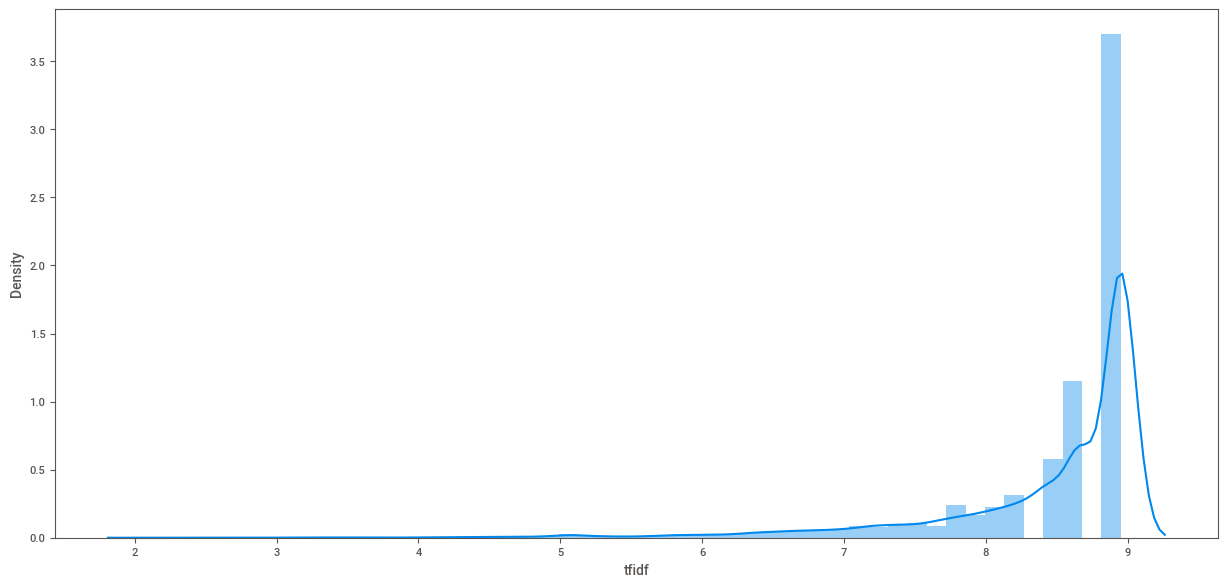

In [124]:
plt.figure(figsize=(15,7))
sns.distplot(tfidf["tfidf"])

## 3.6 CONVERT TF-IDF INTO DATAFRAME

In [126]:
# collect the tfid matrix in numpy array
incident_tfidf_array = incidents_tfidf.todense()

# store the tf-idf array into pandas dataframe
incident_tfidf_df = pd.DataFrame(incident_tfidf_array)
incident_tfidf_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,27432,27433,27434,27435,27436,27437,27438,27439,27440,27441,27442,27443,27444,27445,27446,27447,27448,27449,27450,27451,27452,27453,27454,27455,27456,27457,27458,27459,27460,27461,27462,27463,27464,27465,27466,27467,27468,27469,27470,27471
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3.7 ADD ASSIGNMENT GROUP TO DATAFRAME

In [130]:
incident_tfidf_df['Assignment group']= incidents_data_final_df['Assignment group']

In [131]:
incident_tfidf_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,27433,27434,27435,27436,27437,27438,27439,27440,27441,27442,27443,27444,27445,27446,27447,27448,27449,27450,27451,27452,27453,27454,27455,27456,27457,27458,27459,27460,27461,27462,27463,27464,27465,27466,27467,27468,27469,27470,27471,Assignment group
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GRP_0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GRP_0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GRP_0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GRP_0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GRP_0


In [134]:
features = incident_tfidf_df.columns.tolist()
target = 'Assignment group'
# removing the target from features
features.remove(target)

## 3.8 MODELLING

In [174]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [180]:
df_inc_sample = incidents_data_final_df[incidents_data_final_df['Assignment group'].map(incidents_data_final_df['Assignment group'].value_counts()) > 1]

In [181]:
X = df_inc_sample['token_desc']
y = df_inc_sample['Assignment group']

In [182]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
# encoding train labels 
encoder.fit(y)
y = encoder.transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=13,stratify=y)


log_cols=["Classifier", "accuracy","f1_score"]
log = pd.DataFrame(columns=log_cols)

In [186]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multiclass import OneVsRestClassifier

svc = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', OneVsRestClassifier(LinearSVC(loss='hinge',random_state=42))),
               ])
svc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 OneVsRestClassifier(estimator=LinearSVC(C=1.0,
                                                         class_weight=None,
             

In [188]:

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
y_pred = svc.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('f1 score %s' % f1_score(y_pred, y_test,average='weighted')) 
#print (focal_loss(alpha=.25, gamma=2))

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

log_entry = pd.DataFrame([["LinearSVC",accuracy_score(y_pred, y_test),f1_score(y_pred, y_test,average='weighted')]], columns=log_cols)
log = log.append(log_entry)

accuracy 0.7027663331371395
f1 score 0.7430666579993513
              precision    recall  f1-score   support

           0       0.75      0.95      0.83       795
           1       0.50      0.17      0.25         6
           2       0.80      0.57      0.67        28
           3       0.00      0.00      0.00         6
           4       0.68      0.52      0.59        52
           5       0.56      0.66      0.60        29
           6       0.35      0.25      0.29        24
           7       0.50      0.25      0.33         8
           8       0.33      0.06      0.10        17
           9       0.83      0.94      0.88        16
          10       0.50      0.39      0.44        18
          11       0.43      0.21      0.28        43
          12       0.66      0.52      0.58        48
          13       0.67      0.29      0.40         7
          14       0.33      0.17      0.22         6
          15       0.50      0.33      0.40         6
          16       0.25  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [189]:
log.set_index(["Classifier"],inplace=True)
log.sort_values(by=['f1_score'])

,accuracy,f1_score
Classifier,,
LinearSVC,0.702766,0.743067
